In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed, may indicate binary incompatibility")

import numpy as np
import pandas as pd

import sys, os
sys.path.insert(0, os.path.dirname("../src"))
sys.path.append('../src')

import tpot
from apply_tpot_classifier import load_sample_data
from apply_tpot_classifier import apply_tpot_classifier 

In [2]:
def load_data(): 
    """
    Read sample credit card default data to  pandas dataframe and separate the target column which is 'default'
    Read DataSet_Description.html for more information.
    """
    data = pd.read_csv("../../../../training_ing/spain-team-work/data/UCI_Credit_Card.csv")
    data.rename(columns={'default.payment.next.month': 'class'}, inplace=True)
    X = data.drop("class",axis=1)
    y = data["class"]
    return X,y

X,y = load_data()

In [3]:
def load_sample_data(): 
    """
    Read sample credit card default data to  pandas dataframe and separate the target column which is 'default'
    Read DataSet_Description.html for more information.
    """
    data = pd.read_csv("../../../../training_ing/spain-team-work/data/UCI_Credit_Card.csv")
    X = data.drop("default.payment.next.month",axis=1)
    Y = data.pop('default.payment.next.month')
    #Y = data["default.payment.next.month"]
    return X,Y

In [4]:
X, Y = load_sample_data()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=1990)

In [20]:
default_path = '../exported_files/'

def join_path(file_name, path=default_path):
    """
     Function to join paths and name of a file
     param: 
     file_name: file name 
     path: path to the file name
     
     return:
     full path + filename
     """
    return os.path.join(path, file_name)

def load_score(file_name, path=default_path):
    """
    Function to load the scores from one file and sorts them based on the performance
    param: 
    file_name: file name
    path_name: path to the filename

    return:
    sorted algorithm scores
    """
    full_path = join_path(file_name, path=path)
    return pd.read_csv(full_path, delimiter=',').sort_values(by=['SCORE'])

def load_scores(file_names, path=default_path):
    """
    Function to load the scores from different algorithms and sorts them based
    on the performance
    param:
    file_names: a list of files
    path: path to the file

    return:
    sorted algorithm scores
    """
    #return list(map(load_score, file_names))
    return list(load_score(x) for x in file_names)

myPath = '../exported_files/'
myFiles = ['times_exported_tpot.csv', 'times_exported_bayes_lgb_init3_opt3.csv', 'times_exported_bayes_lgb_init5_opt10.csv', ]

scores = load_scores(myFiles, path=myPath)
#scores_bayesian = load_scores(myFiles, path=myPath)
df_scores = scores[0]
df_bayesian = scores[1] 
df_bayesian_lbm = scores[2]

df_scores.head()



FUNCTION_NAME     SCORE  TIME
6  sklearn.neighbors.KNeighborsClassifier  0.658215   139
0          sklearn.naive_bayes.GaussianNB  0.668923     1
7                   sklearn.svm.LinearSVC  0.721720    75
1         sklearn.naive_bayes.BernoulliNB  0.723001     2
2     sklearn.tree.DecisionTreeClassifier  0.749813    11

In [19]:
df_bayesian.head()

Unnamed: 0                       FUNCTION_NAME    SCORE  TIME
0           0  Bayesopt_lgbmclassifier_init3_opt3  0.78022    74

In [21]:
df_bayesian_lbm.head()

Unnamed: 0                        FUNCTION_NAME     SCORE  TIME
0           0  Bayesopt_lgbmclassifier_init5_opt10  0.780815   233

In [66]:
def simple_concat():
    """
    Function to quick concatinate results with the scores 
    """

    result = pd.concat([df_scores, df_bayesian, df_bayesian_lbm], ignore_index=False, sort = 'True')
    result = result.sort_index(axis = 0)
    return result

result = simple_concat()


def read_zip_results(filename):
    df = pd.read_csv(filename)
    #df = df.rename(index=str, columns={"Test-Score": "SCORE", "Time": "TIME"})
    return df

zip_results = read_zip_results(filename = "../exported_files/z_models.csv")
zip_results.head()


Unnamed: 0          Features                       Model  Test-Score  \
0           1  MostImportant_-1      RandomForestClassifier       0.778   
1           2  MostImportant_-1  GradientBoostingClassifier       0.781   
2           3  MostImportant_-1          LogisticRegression       0.646   

                                          Parameters  \
0  {'criterion': 'entropy', 'min_samples_split': ...   
1       {'loss': 'exponential', 'n_estimators': 123}   
2                         {'C': 0.44043859964021276}   

                                        Actual-Model  Time  
0  RandomForestClassifier(bootstrap=True, class_w...   346  
1  GradientBoostingClassifier(criterion='friedman...   577  
2  LogisticRegression(C=0.44043859964021276, clas...   392

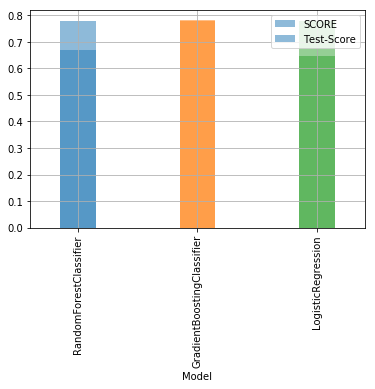

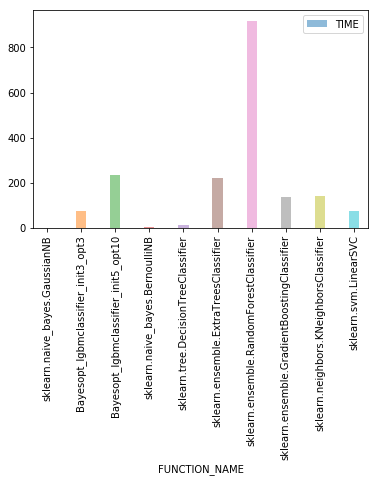

In [65]:
import matplotlib.pyplot as plt

#df.plot(x='FUNCTION_NAME', y='SCORE')
#scores[0].SCORE.plot()
#scores = load_scores(myFiles, path=myPath)
#df = scores
#df1 = scores[0]
#df2 = scores[1]

def scores_plot(df1, df_zip):
    """
    Function to plot the scores of each classifier from different pipelines
    """
    
    fig = plt.figure(figsize=(12,10))
    
    ax1 = df1.plot.bar(x='FUNCTION_NAME', y='SCORE', rot=90, stacked=True, width=0.3, align='center', alpha = 0.5)
    ax2 = df1.plot.bar(x='FUNCTION_NAME', y='TIME', rot=90, stacked=True, width=0.3, align='center', alpha = 0.5)
    
    ax1 = df_zip.plot.bar(x='Model', y='Test-Score', rot=90, stacked=True, width=0.3, align='center', alpha = 0.5, ax=ax1)
    ax2 = df_zip.plot.bar(x='Model', y='Time', rot=90, stacked=True, width=0.3, align='center', alpha = 0.5)
    
    ax1.grid(zorder=0)
    ax2.grid(zorder=0)
     
    #fig1 = plt.gca()
    #fig2 = plt.gca()

    #ax1.set_xticklabels(range(len(df))) #classifiers have long names: try rename or remove this line to see their full names
    #ax2.set_xticklabels(range(len(df)))
    #fig1 = plt.gcf()
    
    #fig1.savefig('../plots/TIME.png')

    ax1.plot()
    ax2.plot()

#df = scores[0]
scores_plot(result, zip_results)


Unnamed: 0          Features                       Model  Test-Score  \
0           1  MostImportant_-1      RandomForestClassifier       0.778   
1           2  MostImportant_-1  GradientBoostingClassifier       0.781   
2           3  MostImportant_-1          LogisticRegression       0.646   

                                          Parameters  \
0  {'criterion': 'entropy', 'min_samples_split': ...   
1       {'loss': 'exponential', 'n_estimators': 123}   
2                         {'C': 0.44043859964021276}   

                                        Actual-Model  Time  
0  RandomForestClassifier(bootstrap=True, class_w...   346  
1  GradientBoostingClassifier(criterion='friedman...   577  
2  LogisticRegression(C=0.44043859964021276, clas...   392

In [50]:

#from time_tpot_classifier import test_tpot_dictionary, time_apply_tpot_classifier

In [ ]:
tpot_class = time_apply_tpot_classifier(X,Y, gen = 2, pop = 50)
#tpot_obj.evaluated_individuals_

In [ ]:
# print part of pipeline dictionary
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)


#print(dict(list(tpot_class._evaluated_individuals.items())[0:2]))
#tpot_obj.evaluated_individuals_

In [ ]:
print(tpot.score( X_train, y_train))

In [ ]:
 classifier_config_dict_costum = {
         #classifiers
        'sklearn.ensemble.ExtraTreesClassifier': {
        'n_estimators': [100],
        'criterion': ["gini", "entropy"],
        'max_features': np.arange(0.05, 1.01, 0.05),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21),
        'bootstrap': [True, False]},
         
         # Preprocesssors
         'sklearn.preprocessing.Binarizer': {
        'threshold': np.arange(0.0, 1.01, 0.05)},
        
           # Selectors
        'sklearn.feature_selection.SelectFwe': {
        'alpha': np.arange(0, 0.05, 0.001),
        'score_func': {
            'sklearn.feature_selection.f_classif': None
        }}}
        

In [ ]:
from deap import creator
from sklearn.model_selection import cross_val_score
pipeline_str = list(tpot.evaluated_individuals_.keys())[0]
print(pipeline_str)
print(tpot.evaluated_individuals_[pipeline_str])
optimized_pipeline = creator.Individual.from_string(pipeline_str, tpot._pset) 
fitted_pipeline = tpot._toolbox.compile(expr=optimized_pipeline ) 
print(fitted_pipeline)
scores = cross_val_score(fitted_pipeline, X_train, y_train, cv=5, scoring='roc_auc', verbose=1)
print(np.mean(scores))


In [ ]:
pipeline_s = list(tpot.evaluated_individuals_.keys())
#len(pipeline_s)
pipeline_s

In [ ]:
optimized_pipeline = creator.Individual.from_string(pipeline_str, tpot._pset) 
print(optimized_pipeline)

In [ ]:
pipeline_str = list(tpot.evaluated_individuals_.keys())
#pipeline_str
#print(list(tpot.evaluated_individuals_.keys())[list(tpot.evaluated_individuals_.values()).key(DecisionTreeClassifier)]) 

#print(len(pipeline_str))
#for k, v in tpot.evaluated_individuals_.items():
#    print(k, v)

#print(list(tpot.evaluated_individuals_.keys())[0])
#print(list(tpot.evaluated_individuals_.values()))
#tpot.evaluated_individuals_["DecisionTreeClassifier"]
#tpot.evaluated_individuals_['DecisionTreeClassifier']

def get_tpot_dict(pipeline, classifier):
    pipeline = tpot.evaluated_individuals_.items()
    classifier = "ExtraTreesClassifier"
    my_dict = {k: v for k, v in pipeline if classifier in k}
    return my_dict
    
a = get_tpot_dict(pipeline = list(tpot.evaluated_individuals_.keys()), classifier = "ExtraTreesClassifier")
#print(a)   
#my_dict = {k: v for k, v in tpot.evaluated_individuals_.items() if "DecisionTreeClassifier" in k}


for k, v in my_dict.items():
    print(k, v)
    
#d = dict((k, v) for k, v in a.items() if v['cv_score'] >=0.7)
#d
#pipeline_str

In [ ]:
# print a pipeline and its values
pipeline_str = list(tpot._evaluated_individuals.keys())[0]
print(pipeline_str)
print(tpot._evaluated_individuals[pipeline_str])
# convert pipeline string to scikit-learn pipeline object
optimized_pipeline = creator.Individual.from_string(pipeline_str, tpot._pset) # deap object
fitted_pipeline = tpot._toolbox.compile(expr=optimized_pipeline ) # scikit-learn pipeline object
# print scikit-learn pipeline object
print(fitted_pipeline)
# Fix random state when the operator allows  (optional) just for get consistent CV score 
tpot._set_param_recursive(fitted_pipeline.steps, 'random_state', 42)
# CV scores from scikit-learn
scores = cross_val_score(fitted_pipeline, X_train, y_train, cv=5, scoring='accuracy', verbose=0)
print(np.mean(scores))
print(tpot._evaluated_individuals[pipeline_str][1])


In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols=1)
#nrows = df.columns
#ncols = len(df)
for i, c in enumerate(df.columns):
    df[c].plot(kind='bar', ax=axes[i], figsize=(12, 10), title=c)

#plt.savefig('plot.png', bbox_inches='tight')

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.tree import ExtraTreeClassifier

exported_pipeline = make_pipeline(
    Normalizer(),
    GaussianNB()
)

In [ ]:
from tpot import TPOTRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

housing = load_boston()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target,
                                                    train_size=0.75, test_size=0.25)

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_boston_pipeline.py')

In [ ]:
def apply_tpot_regressor(X, y,generation, pop, cv=2, train_size=0.75, test_size=0.25):
    """
    Function to apply tpot regression
    """
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size, random_state=1989)
    tpot = TPOTRegressor(generations=generation, population_size=pop, verbosity=2) #recomended pop = 50
    tpot.fit(X_train, y_train)
    print(tpot.score(X_test, y_test))
    tpot.export('../exported_files/apply_tpot_regression.py')
    
apply_tpot_regressor(X,Y, generation = 5, pop = 50)